In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib widget

In [2]:
df = pd.read_pickle('output_data.pkl')

In [3]:
# df

/home/seva/code/flexframeworktest/.venv/lib/python3.10/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


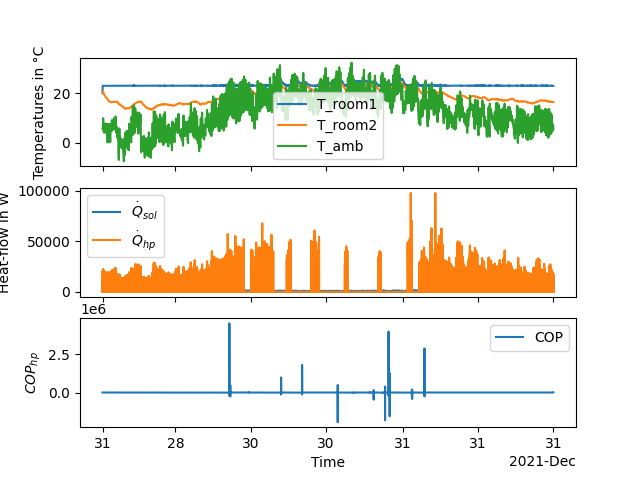

In [4]:
df.interpolate('ffill', inplace=True)
dtindex = df.index 
fig, ax = plt.subplots(3, sharex=True)
# Roomtemperatures
ax[0].plot(dtindex, df['building_1_T_room1'], label='T_room1', drawstyle='steps-post')
ax[0].plot(dtindex, df['building_1_T_room2'], label='T_room2', drawstyle='steps-post')
ax[0].plot(dtindex, df['weather_1_T_air'], label='T_amb', drawstyle='steps-post')
ax[0].legend()
ax[0].set_ylabel('Temperatures in °C')

ax[1].plot(dtindex, df['building_1_dot_Q_sol'], label='$\dot{Q}_{sol}$', drawstyle='steps-post')
ax[1].plot(dtindex, df['heatpump_1_dot_Q_hp'], label='$\dot{Q}_{hp}$', drawstyle='steps-post')
ax[1].legend()
ax[1].set_ylabel('Heat-flow in W')

ax[2].plot(dtindex, df['heatpump_1_cop'], label='COP', drawstyle='steps-post')
ax[2].legend()
ax[2].set_ylabel('$COP_{hp}$')

ax[-1].set_xlabel('Time')
ax[-1].xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax[-1].xaxis.get_major_locator(),))

In [5]:
l = 1000
c = 5
a = np.random.random((l, c))  # .reshape((5, 1000))

d = pd.DataFrame(a, index=np.arange(l), columns=[str(i) for i in range(c)])

In [6]:
%%timeit
for i in range(l):
    f = a[i, [0, 2, 4]]
    # print(f)
    # break


2.52 ms ± 34.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
%%timeit
ind = np.array([0, 2, 4])
for i in range(l):
    f = a[i, ind]
    # print(f)
    # break


1.32 ms ± 4.73 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [8]:
%%timeit
for i in range(l):
    f = a[[i], [0, 2, 4]]
    # print(f)
    # break

3.03 ms ± 30.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
%%timeit
for i in range(l):
    f = a[i][[0, 2, 4]]
    # print(f)
    # break

1.16 ms ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [10]:
%%timeit
for i in range(l):
    f = d.loc[i, ['0', '2', '4']]
    # print(f)
    # break

441 ms ± 1.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
b = np.full((l, c), np.nan)

e = pd.DataFrame([], index=np.arange(l), columns=[str(i) for i in range(c)])

# f = [10., 20., 30., 40., 50.]
f = np.array([10., 20., 30., 40., 50.])

In [12]:
%%timeit
for i in range(l):
    a[i][[0, 2, 4, 1, 3]] = f

1.2 ms ± 3.11 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [13]:
%%timeit
for i in range(l):
    a[i, [0, 2, 4, 1, 3]] = f

2.27 ms ± 5.96 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
%%timeit
for i in range(l):
    a[[i], [0, 2, 4, 1, 3]] = f

2.87 ms ± 9.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
%%timeit
for i in range(l):
    a[i] = f

359 µs ± 2.76 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [16]:
%%timeit
for i in range(l):
    d.loc[i, ['0', '2', '4', '1', '3']] = f

1.1 s ± 498 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
